**Phase 1: Advertisement - Click on Ad Project**
-----

Section No. 60121 - Group No. 6

Noura AlKhorayef - 441201063,
Shoug AlShaybani - 441200872,
Shahad AlShaikh - 441201213

**Introduction**                                                                                                         
Online advertising, commonly referred to as web advertising, is a type of marketing and advertising that makes use of the Internet to inform audiences and platform users about goods and services.
One of the most efficient e-marketing strategies is to place advertisements on various websites. Today, many people use the Internet on a daily basis and while browsing websites, we frequently come across advertisements. While we may ignore some of them, others may catch our attention, and we may click on them to find out more.
We chose our dataset because we are interested in knowing what kinds of advertisements are more likely to get clicked on and by which ages and in which countries. As this also will help the advertising companies know how to distribute their ads to acquire the highest benefits possible.

Our dataset indicates whether or not a particular internet user clicked on an advertisement.  Each observation includes the following attributes: 'Daily Time Spent on Site': consumer time on site in minutes 'Age': customer age in years 'Area Income': Avg. Income of geographical area of consumer 'Daily Internet Usage': Avg. minutes a day consumer is on the internet 'Ad Topic Line': Headline of the advertisement 'City': City of consumer 'Male': Whether or not consumer was male 'Country': Country of consumer 'Timestamp': Time at which consumer clicked on Ad or closed window 'Clicked on Ad': 0 or 1 indicated clicking on Ad

**Problem**                                                                                                              
Our problem will be classification on A fake advertising data set indicating whether a user clicked on ad or not
So, data will be classified into 2 categories.
0=no, 1=yes

________________________________________________________________________________________________________


First we start with importing the libraries

In [4]:
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling

**Data Source:**
the dataset is called the Advertisement - Click on Ad dataset which we got from kaggle.com website. Kaggle is an online community platform for data scientists and machine learning enthusiasts. Kaggle allows users to collaborate with other users, find and publish datasets, use GPU integrated notebooks, and compete with other data scientists to solve data science challenges. Something great about Kaggle is you can get any dataset you like by simply downloading it.  
URL:https://www.kaggle.com/datasets/gabrielsantello/advertisement-click-on ad?resource=download 

In [6]:
# import the dataset
df = pd.read_csv('advertising(before).csv')

It consists of exactly 1000 observations that each consist of 10 variables (Daily Time Spent on Site, age, Area income, Daily Internet Usage, Ad Topic Line, City, Male, Country, Timestamp, Clicked on Ad) 

In [7]:
#number of observations 
len(df)

1000

In [5]:
#number of variables
df.shape[1]

10

 **Variable types:** We got the variable names and types by computing this line of code: 

In [226]:
#data type of each variable 
df.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

and we can see that we have 3 variables with type float , 4 variables with type object and 3 with type int.

In [7]:
#The first 10 records of our dataset
df.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


**Calculating the mean :** To find the mean and some statistical summaries of the dataset we use describe().

In [229]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


we can see from the above table the mean of each variable:                                                              
    Daily Time Spent on Site = 65.000200                                                                                
    Age	=  36.009000                                                                                                    
    Area Income = 55000.000080                                                                                          
    Daily Internet Usage =  180.000100                                                                                  
    Male = 0.481000	                                                                                                    
    Clicked on Ad = 0.50000

**Checking missing values:**

In [8]:
#finding missing values
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

As we can see above there is no missing values in our dataset

**Variables variance:** below we have calculated the variance of columns that contains numeric values:

In [19]:
#calculate variance of each variable
print('variables variance: ')
print('Daily Time Spent on Site: ',df['Daily Time Spent on Site'].var())
print('Age: ',df['Age'].var())
print('Area Income: ',df['Area Income'].var())
print('Daily Internet Usage: ',df['Daily Internet Usage'].var())
print('Male: ',df['Male'].var())
print('Clicked on Ad: ',df['Clicked on Ad'].var())

variables variance: 
Daily Time Spent on Site:  251.33709485485454
Age:  77.18610510510509
Area Income:  179952405.95177534
Daily Internet Usage:  1927.4153961861869
Male:  0.24988888888888955
Clicked on Ad:  0.2502502502502503


**Plotting distribution graphs:** We plotted the distribution of all our variables shown in the diagrams below for each variable: 

array([[<Axes: title={'center': 'Daily Time Spent on Site'}>]],
      dtype=object)

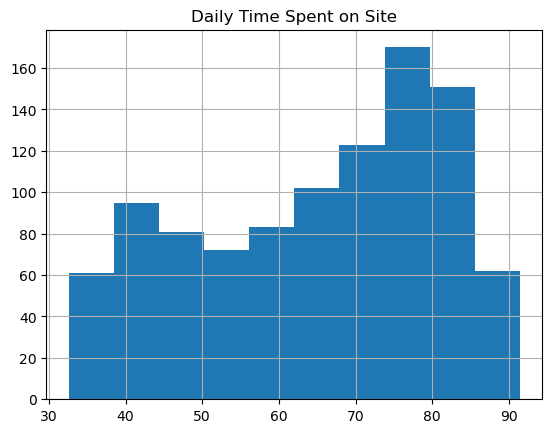

In [232]:
#distribution of variable “Daily Time Spent on Site” 
df.hist(column='Daily Time Spent on Site')

We can see that that the variable “Daily Time Spent on Site” is distributed from 32 to 91 approximately, as the majority of time spent is between 75 to 85 on site. which is shown in the figure above.

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

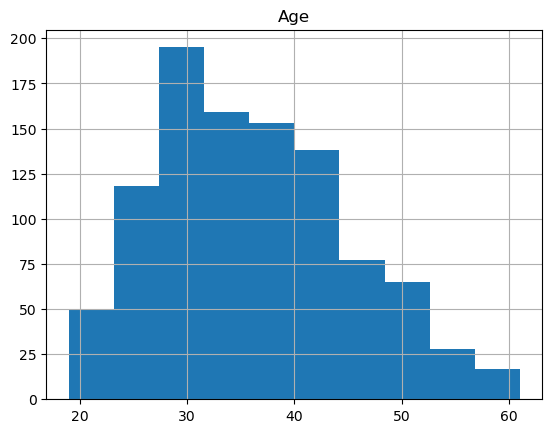

In [233]:
#distribution of variable “Age” 
df.hist(column='Age')

For the distribution of variable “Age” it's  distributed starting from 19 to 61, we can see that the most age range is 28 to 32 approximately while age from 55 to 60 is rare. which is shown in the figure above.

array([[<Axes: title={'center': 'Area Income'}>]], dtype=object)

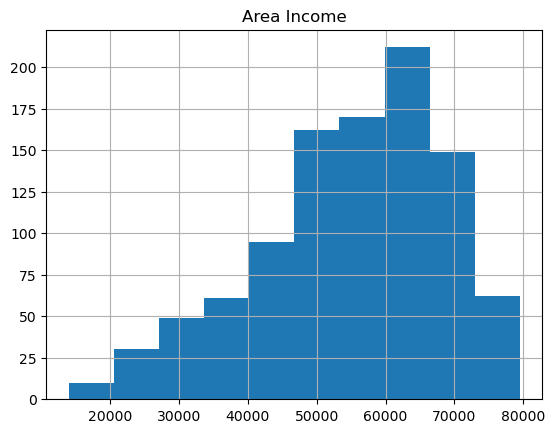

In [234]:
#distribution of variable “Area Income” 
df.hist(column='Area Income')

The distribution of variable “Area Income” is distributed from 13996 to 79484 approximately, and the majority of the area incomes is in between 60000 to 60600 approximately while income = 20000 is very rare. which is shown in the figure above.

array([[<Axes: title={'center': 'Daily Internet Usage'}>]], dtype=object)

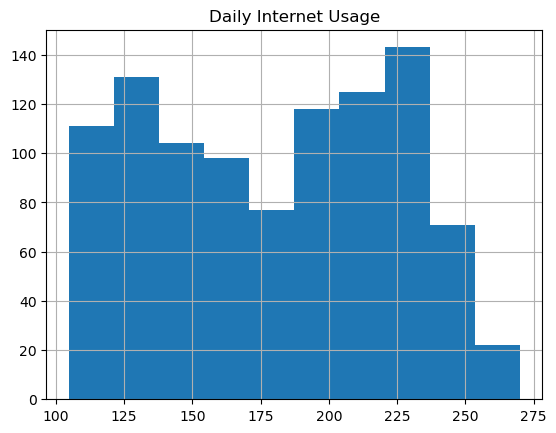

In [235]:
#distribution of variable “Daily Internet Usage” 
df.hist(column='Daily Internet Usage')

For the variable “Daily Internet Usage” we can see in the figure shown above that it ranks the most distributed variable among all other variables. it is distributed starting from 104 to 270 approximately And the most daily intenet usege is from 220 to 235 approximately. Also we can see that there is very little number of people using the internet for more than 255 minutes.

array([[<Axes: title={'center': 'Male'}>]], dtype=object)

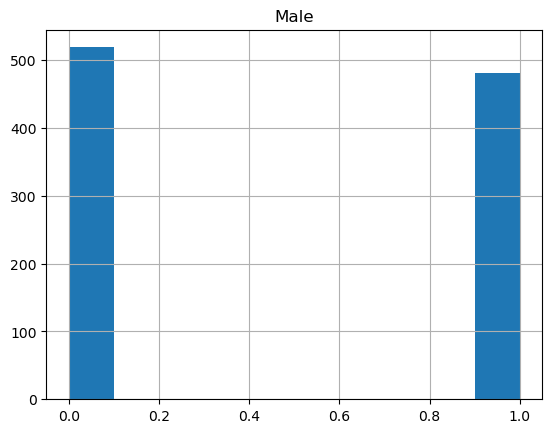

In [236]:
#distribution of variable “Male” 
df.hist(column='Male')

As shown in the figure above the females which is 0 ranks first by slightly a little bit than the male which is 1.

array([[<Axes: title={'center': 'Clicked on Ad'}>]], dtype=object)

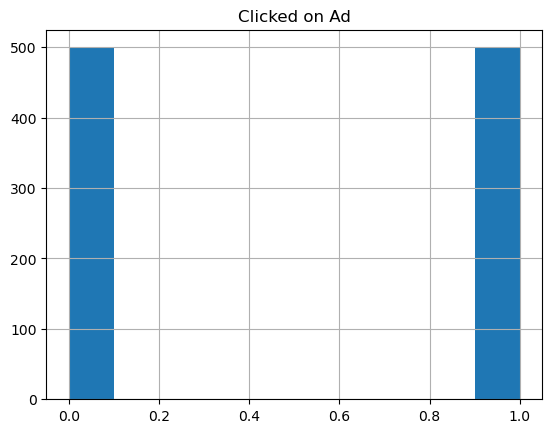

In [237]:
#distribution of variable “Clicked on Ad” 
df.hist(column='Clicked on Ad')

Variable “Clicked on Ad” which is our target variable in the dataset is distributed among two binary values 0 and 1 as shown in the figure above. and they are equal as there is 500 rows labled as 0 ,and 500 rows labled as 1.

**joint plot:** which is a way of understanding the relationship between two variables and the distribution of individuals of each variable.(1)

(1)“Joint Plot in Python - Javatpoint,” www.javatpoint.com. https://www.javatpoint.com/joint-plot-in-python 

In [238]:
# importing important libraries
import seaborn as sns 
import matplotlib.pyplot as plt  

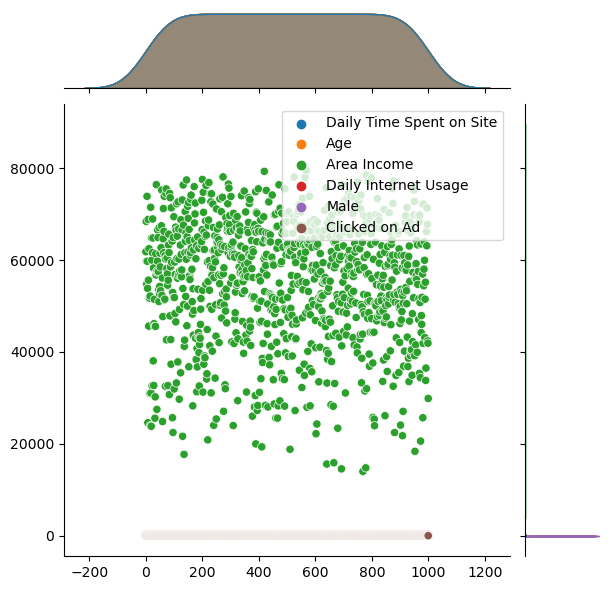

In [240]:
#joint plot drawing
sns.jointplot(data=df, dropna= True)
plt.show()

In figure above we can see the joint plot for our variables among the data set, Where the variable “Area Income” is widely disturbed as we can see and mostly in between 60000 to 80000.

**Pre-Processing :**


Data preprocessing is important as it prepares the data and enhances the possible results

**1.  DATA CLEANING**  

Handling the missing data (if any)

In [11]:
# Any missing values?
df.isnull().values.any()
# Total missing values for each feature
print ( df.isnull().sum() )

# max occurence
frqMale = df['Male'].value_counts() 
# Replace missing values 
df['Male'].fillna(frqMale, inplace=True) #If there is missing data Fill nan with the value which has max occurence

df['Country'].fillna("Not given", inplace=True)
df['City'].fillna("Not given", inplace=True)

# second option is to drop these values --- lacking certain attributes of interest
df['Clicked on Ad'].dropna()

# Fill average values in place for nan, fill with mean
df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean(), inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Area Income'].fillna(df['Area Income'].mean(), inplace=True)

as we can see, there are no missig data in our dataset.

But, In case there is missing data In (Male) Attribute => Fill nan with the value which has max occurence.

In case we're missing certain attribute of intrest (Clicked on ad) the option is to drop these values.

In case there is missing data In these numerical attributs (Age, area Income, daily internet usage)  =>  Fill average values in place for nan, fill with mean.

**2.  Data transformation**  

We transform features primarily for the following reasons:

* Mandatory transformations for data compatibility. Examples include:

Converting non-nume* ric features into numeric. You can’t do matrix multiplication on a string, so we must convert the string to some numeric representation.
Resizing inputs to a fixed size. Linear models and feed-forward neural networks have a fixed number of input nodes, so your input data must always have the same size. For example, image models need to reshape the images in their dataset to a fixed size.

* Optional quality transformations that may help the model perform better. Examples include:

Tokenization or lower-casing of text features.
Normalized numeric features (most models perform better afterwards).
Allowing linear models to introduce non-linearities into the feature space.
Strictly speaking, quality transformations are not necessary--your model could still run without them. But using these techniques may enable the model to give better results.


Source: https://developers.google.com/machine-learning/data-prep/transform/introduction

Our data from Kaggle is ready, there are no need to do this step

But, Here is How we could do it

In [242]:
# change the value to the correct one
df['Male'].replace(['no','yes'],[0,1],inplace=True)

**3.   Data discretization**

part of data reduction, replacing numerical attributes with nominal ones.

We choose [Daily Internet Usage] column and put them into 3 buckets with labels (Below Average, Average, Above Average) 

In [243]:
#GROUPING INTERNET USAGE RECORDS
df['Internet usage bucket']=pd.cut(df['Daily Internet Usage'],3,labels=['Below average','Average','Above average'])
df.head(10)


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Internet usage bucket
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,Above average
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,Average
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,Above average
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,Above average
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,Above average
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0,Above average
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0,Average
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1,Below average
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0,Above average
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0,Average


**finally, we save all the changes to new csv file to use the pre-processed data in the project**

In [244]:
#Export Pandas DataFrame after pre-processing to a CSV File
df.to_csv(r'C:\Ai-project\pr_advertisment.csv')